Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3330
           1       0.99      0.85      0.92      2110

    accuracy                           0.94      5440
   macro avg       0.95      0.93      0.94      5440
weighted avg       0.95      0.94      0.94      5440

Accuracy: 0.9412
AUC: 0.9964
Confusion Matrix:
[[3320   10]
 [ 310 1800]]


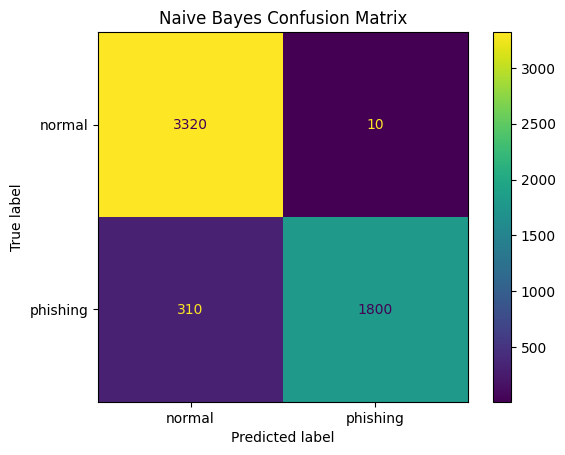



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3330
           1       0.97      0.96      0.96      2110

    accuracy                           0.97      5440
   macro avg       0.97      0.97      0.97      5440
weighted avg       0.97      0.97      0.97      5440

Accuracy: 0.9715
AUC: 0.9965
Confusion Matrix:
[[3263   67]
 [  88 2022]]


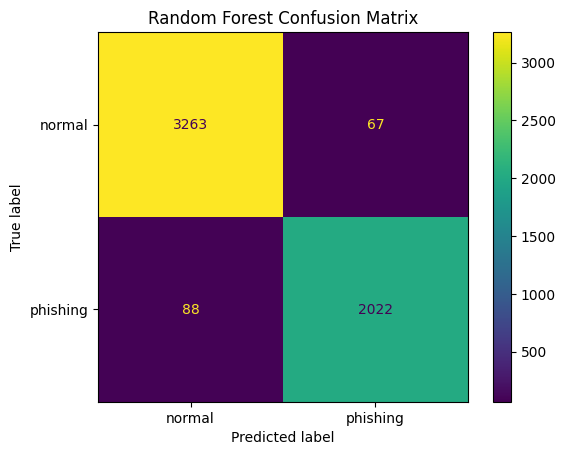



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3330
           1       0.98      0.93      0.95      2110

    accuracy                           0.97      5440
   macro avg       0.97      0.96      0.96      5440
weighted avg       0.97      0.97      0.97      5440

Accuracy: 0.9654
AUC: 0.9961
Confusion Matrix:
[[3289   41]
 [ 147 1963]]


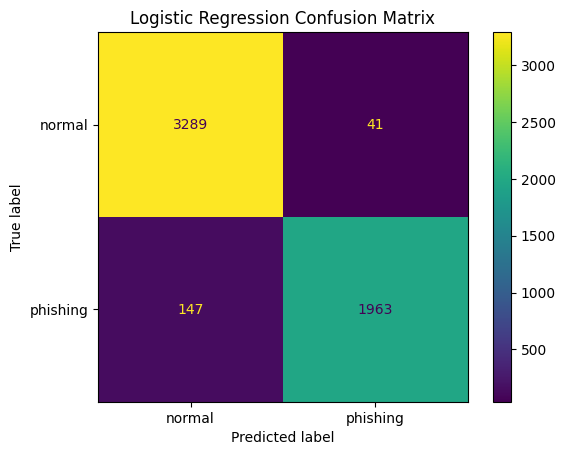

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load the training and testing data
train_df = pd.read_csv('../data/processed/train_emails.csv')
test_df = pd.read_csv('../data/processed/test_emails.csv')

# Handle NaN values
train_df['Email Text'] = train_df['Email Text'].fillna('')
test_df['Email Text'] = test_df['Email Text'].fillna('')
train_df = train_df[~train_df['Email Text'].str.strip().isin(['', 'empty'])]
test_df = test_df[~test_df['Email Text'].str.strip().isin(['', 'empty'])]

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['Email Text'])
X_test = vectorizer.transform(test_df['Email Text'])

# Encode the labels
y_train = train_df['Email Type'].map({'Phishing Email': 1, 'Safe Email': 0})
y_test = test_df['Email Type'].map({'Phishing Email': 1, 'Safe Email': 0})

# List of models to train
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    proba_predictions = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    
    # Overall accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # AUC
    auc = roc_auc_score(y_test, proba_predictions)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, predictions))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'phishing'])
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    print("\n")
